In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [39]:
dataset1_path = "/Users/samyakjain/ML_Project_Jain/Missing Data/MissingData1.txt"
dataset2_path = "/Users/samyakjain/ML_Project_Jain/Missing Data/MissingData2.txt"

try:
    dataset1 = pd.read_csv(dataset1_path, sep='\s+', header=None)
    dataset2 = pd.read_csv(dataset2_path, sep='\s+', header=None)
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading datasets: {e}")
    exit()

Datasets loaded successfully.



Processing Dataset 1...

Data with missing values (NaN):
     0     1     2     3     4     5     6     7     8     9     10    11  \
0 -0.11  0.02 -0.36 -0.11  0.48 -0.20  0.27  0.29 -0.34 -0.05  0.23  0.08   
1 -0.30 -0.37 -0.18 -0.09 -0.16 -0.16 -0.10 -0.09  0.46  0.32  0.02  0.31   
2  0.50  0.18  0.41   NaN   NaN  0.15 -0.25 -0.41 -0.07 -0.13 -0.15 -0.01   
3  0.00 -0.11   NaN  0.19  0.00 -0.07  0.18  0.18 -0.23 -0.16  0.03 -0.12   
4  0.40 -0.16  0.31 -0.34  0.02  0.21 -0.70  0.11  0.08  0.05 -0.09  0.07   

     12    13  
0 -0.45  0.25  
1  0.40 -0.07  
2 -0.28 -0.09  
3 -0.11  0.23  
4  0.04 -0.01  

Data after imputation:
     0     1         2         3         4     5     6     7     8     9   \
0 -0.11  0.02 -0.360000 -0.110000  0.480000 -0.20  0.27  0.29 -0.34 -0.05   
1 -0.30 -0.37 -0.180000 -0.090000 -0.160000 -0.16 -0.10 -0.09  0.46  0.32   
2  0.50  0.18  0.410000  0.007404 -0.014589  0.15 -0.25 -0.41 -0.07 -0.13   
3  0.00 -0.11 -0.017806  0.190000  0.000000 -0.07  

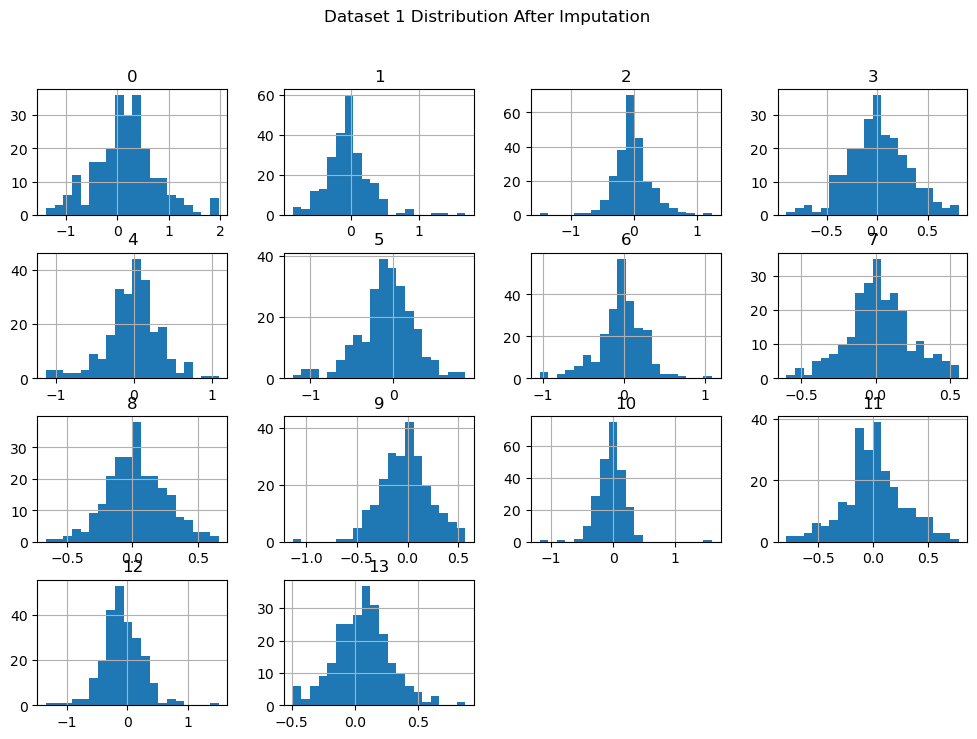


Visualizing Dataset 2...


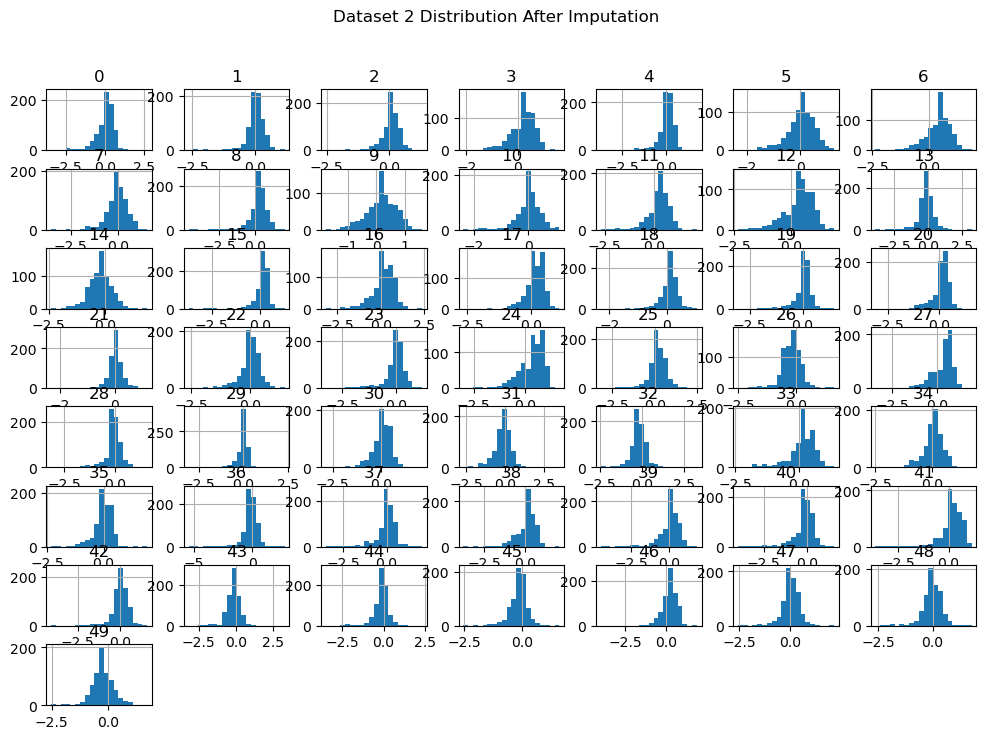

Imputed datasets saved successfully!


In [40]:
def replace_missing_values(df, missing_value_indicator=1.0e+99, strategy='mean'):
    try:
        df.replace(missing_value_indicator, np.nan, inplace=True)
        print("\nData with missing values (NaN):")
        print(df.head())  

        imputer = SimpleImputer(strategy=strategy)
        df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

        print("\nData after imputation:")
        print(df_imputed.head()) 

        return df_imputed
    except Exception as e:
        print(f"Error during missing value replacement: {e}")
        return None

# Process datasets
print("\nProcessing Dataset 1...")
dataset1_imputed = replace_missing_values(dataset1, strategy='mean')

print("\nProcessing Dataset 2...")
dataset2_imputed = replace_missing_values(dataset2, strategy='mean')

print("\nChecking for missing values:")
print("Dataset 1 missing values per column:")
print(dataset1_imputed.isnull().sum())

print("\nDataset 2 missing values per column:")
print(dataset2_imputed.isnull().sum())

def visualize_distributions(df, title):
    try:
        df.hist(figsize=(12, 8), bins=20)
        plt.suptitle(title)
        plt.show()
    except Exception as e:
        print(f"Error visualizing data distribution: {e}")

print("\nVisualizing Dataset 1...")
visualize_distributions(dataset1_imputed, "Dataset 1 Distribution After Imputation")

print("\nVisualizing Dataset 2...")
visualize_distributions(dataset2_imputed, "Dataset 2 Distribution After Imputation")

save_results = input("Do you want to save the imputed datasets? (yes/no): ").strip().lower()
if save_results == "yes":
    try:
        dataset1_imputed.to_csv("JainMissingResult1.txt", sep='\t', index=False, header=False)
        dataset2_imputed.to_csv("JainMissingResult2.txt", sep='\t', index=False, header=False)
        print("Imputed datasets saved successfully!")
    except Exception as e:
        print(f"Error saving datasets: {e}")
else:
 print("Datasets were not saved.")